In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
dataset=pd.read_csv('/content/BostonHousing.csv')

In [4]:
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
dataset.isnull().sum().sum()

0

## Understanding the correlation between various features : we have 14 features here

In [7]:
correlation = dataset.corr() # by default method="pearson"

In [8]:
correlation

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

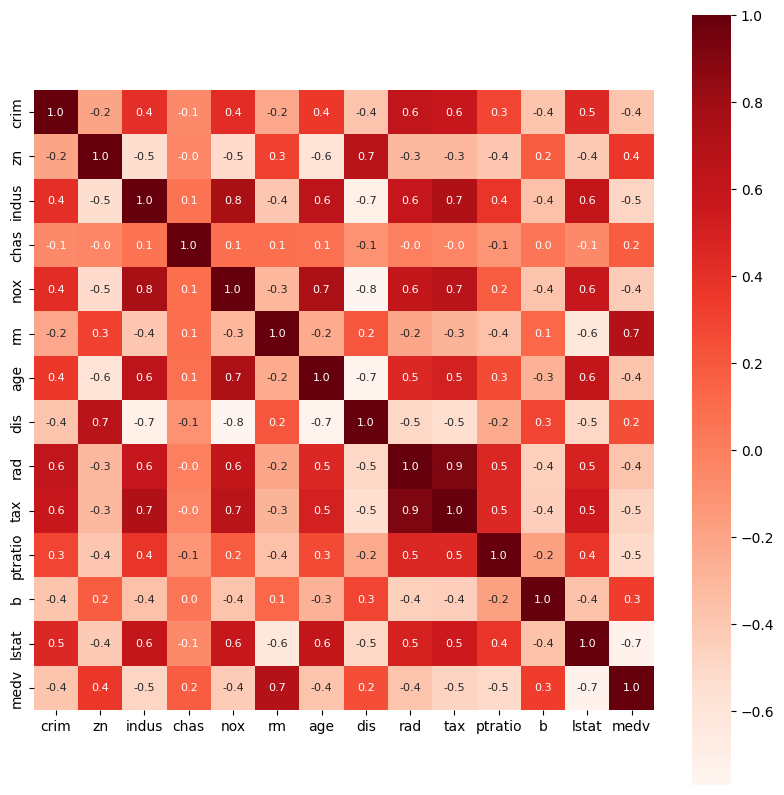

In [9]:
# constructing a heatmap to understand the correlation

# just for size : matplotlib used
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

# heatmap: purely seaborn se
import seaborn as sns
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Reds' )

In [10]:
X = dataset.drop(['medv'],axis=1)
y = dataset['medv']

In [11]:
# splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)
## this is regression problem, so no stratify argumant required


Model training

XGBoost Regressor : ensemble based model : combination of many models.

XGBoost regression is widely used for tasks such as predicting house prices, stock prices, or any other continuous target variable. It's known for delivering state-of-the-art results in machine learning competitions.


In [13]:
# loading the model
model = XGBRegressor()

In [14]:
# training the model with x_train and y_train
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [15]:
training_data_prediction = model.predict(X_train)

In [16]:
# R^2 error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean absolute error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squared error : " , score_1)
print("Mean absolute error  : ",score_2)

# more the data = more accurate model performance

R squared error :  0.9999980039471451
Mean absolute error  :  0.0091330346494618


In [17]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)


# prediction on test data

# R^2 error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean absolute error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : " , score_1)
print("Mean absolute error  : ",score_2)

R squared error :  0.9051721149855378
Mean absolute error  :  2.0748727686264927


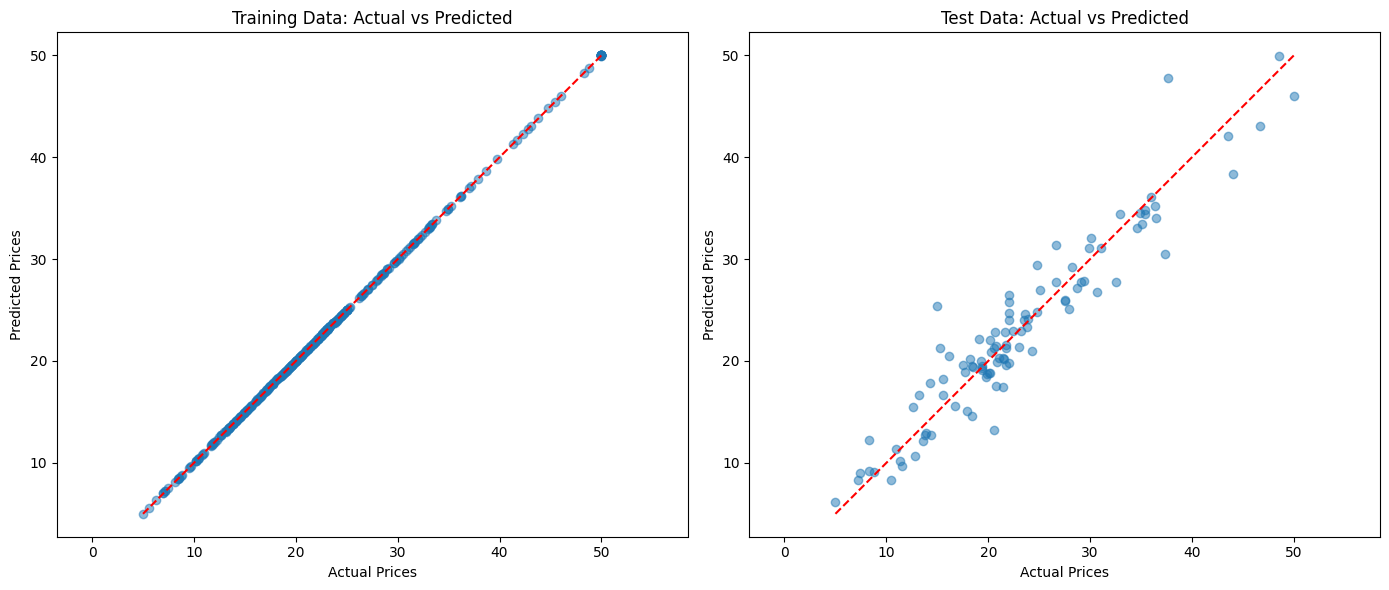

In [20]:
import matplotlib.pyplot as plt

# Visualizing Training Data
plt.figure(figsize=(14, 6))

# Storing actual prises.
actual_train_prices = y_train
actual_test_prices = y_test

# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(actual_train_prices, training_data_prediction, alpha=0.5)
plt.plot([min(actual_train_prices), max(actual_train_prices)],
         [min(actual_train_prices), max(actual_train_prices)], color='red', linestyle='--')  # Line for perfect prediction
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.axis('equal')

# Scatter plot for test data
plt.subplot(1, 2, 2)
plt.scatter(actual_test_prices, test_data_prediction, alpha=0.5)
plt.plot([min(actual_test_prices), max(actual_test_prices)],
         [min(actual_test_prices), max(actual_test_prices)], color='red', linestyle='--')  # Line for perfect prediction
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.axis('equal')

plt.tight_layout()
plt.show()
